# A partir do dataset abaixo foram realizadas 10 perguntas no tema analise exploratoria, responda as 10 perguntas corretamentes.

## Importando as Libs

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

class color: # para formatar os prints
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Teste!' + color.END)

Teste!


## Importando o DataSet

In [3]:
df = pd.read_csv('hotel_bookings.csv', delimiter = ',')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Colunas existentes no DF 

In [83]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Qual é o tamanho do Data Frame? - Quantidade de linhas e colunas

In [4]:
df.shape

(119390, 32)

## Quais são os tipos de dados existentes?

In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Existem dados faltantes? 

In [7]:
print(pd.isnull(df).sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Renomeando os meses da coluna 'arrival_date_month'

In [77]:
df['arrival_date_month'] = df['arrival_date_month'].replace({'August': "Agosto", 
                      'July': "Julho", 
                      'May': "Maio", 
                      'October': "Outubro", 
                      'April': "Abril", 
                      'June': "Junho",
                      'September': "Setembro",
                      'March': "Março",
                      'February': 'Fevereiro',
                      'November': "Novembro",
                      'December': "Dezembro",
                      'January': "Janeiro"})
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,Julho,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,Julho,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,Julho,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,Julho,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,Julho,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Períodos do ano com maior quantidade de viagens


Mêses do ano com maior quantidade de viagens (Do maior para o menor): 


Agosto       13877
Julho        12661
Maio         11791
Outubro      11160
Abril        11089
Junho        10939
Setembro     10508
Março         9794
Fevereiro     8068
Novembro      6794
Dezembro      6780
Janeiro       5929
Name: arrival_date_month, dtype: int64




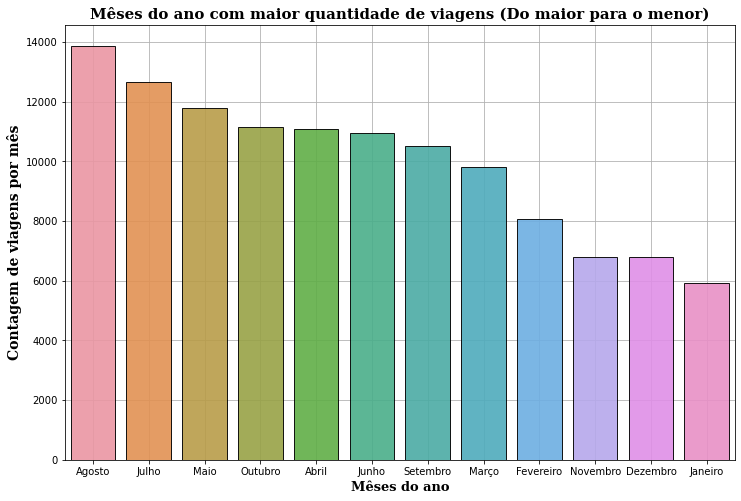

In [82]:
print(color.BOLD)
print('Mêses do ano com maior quantidade de viagens (Do maior para o menor): ')
print('\n')
print(df['arrival_date_month'].value_counts())
print('\n')

plt.figure(figsize = (12,8))
sns.countplot(df['arrival_date_month'], data = df, order = df['arrival_date_month'].value_counts().index, linewidth = 1, edgecolor = 'black', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title('Mêses do ano com maior quantidade de viagens (Do maior para o menor)', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.xlabel('Mêses do ano', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 13})
plt.ylabel('Contagem de viagens por mês', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
warnings.filterwarnings('ignore')

## Quantos adultos totais estão contidos nesse conjunto de dados

In [123]:
print(color.BOLD)
print(f"A quantidade total de adultos que realizaram aluguma reserva foi de: {sum(df['adults'])} adultos totais.")


A quantidade total de adultos que realizaram aluguma reserva foi de: 221636 adultos totais.


## Quantos dos adultos totais tem filhos

In [126]:
print(color.BOLD)
print(df['children'].value_counts())


0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64


In [129]:
print(color.BOLD)
df_pai_crianca = df[df['children'] != 0.0]
print(f"A quantidade total de adultos que possuem filhos é de: {len(df_pai_crianca)} do total.")


A quantidade total de adultos que possuem filhos é de: 8594 do total.


In [130]:
print(color.BOLD)
print(df_pai_crianca['children'].value_counts())


1.0     4861
2.0     3652
3.0       76
10.0       1
Name: children, dtype: int64


## Quantos dos adultos totais tem bebês

In [131]:
print(color.BOLD)
print(df['babies'].value_counts())


0     118473
1        900
2         15
9          1
10         1
Name: babies, dtype: int64


In [132]:
print(color.BOLD)
df_pai_bebe = df[df['babies'] != 0]
print(f"A quantidade total de adultos que possuem bebês é de: {len(df_pai_bebe)} do total.")


A quantidade total de adultos que possuem bebês é de: 917 do total.


In [133]:
print(color.BOLD)
print(df_pai_crianca['babies'].value_counts())


0    8419
1     172
2       3
Name: babies, dtype: int64


## Qual a lista de países únicos de origem dos viajantes


Lista de países origem contidos no DataSet: 


['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD', 'USA', 'CHE', 'CN', 'AUT', 'SWE', 'CHN', 'POL', 'ISR', 'RUS', 'NOR', 'ROU', 'FIN', 'DNK', 'AUS', 'AGO', 'LUX', 'MAR', 'TUR', 'HUN', 'ARG', 'JPN', 'CZE', 'IND', 'KOR', 'GRC', 'DZA', 'SRB', 'HRV', 'MEX', 'EST', 'IRN', 'LTU', 'ZAF', 'BGR', 'NZL', 'COL', 'UKR', 'MOZ', 'CHL', 'SVK', 'THA', 'ISL', 'SVN', 'LVA', 'ARE', 'TWN', 'CYP', 'SAU', 'PHL', 'SGP', 'TUN', 'IDN', 'NGA', 'EGY', 'URY', 'LBN', 'PER', 'HKG', 'MYS', 'ECU', 'BLR', 'VEN', 'CPV', 'GEO', 'JOR', 'CRI', 'KAZ', 'GIB', 'MLT', 'OMN', 'AZE', 'MAC', 'KWT', 'QAT', 'DOM', 'IRQ', 'PAK', 'BIH', 'ALB', 'PRI', 'MDV', 'BGD', 'SEN', 'BOL', 'CMR', 'MKD', 'PAN', 'GNB', 'TJK', 'CUB', 'VNM', 'ARM', 'JEY', 'LBY', 'MUS', 'AND', 'LKA', 'KEN', 'JAM', 'CIV', 'FRO', 'SUR', 'TZA', 'MNE', 'BHR', 'CAF', 'GHA', 'MCO', 'BRB', 'ZWE', 'PRY', 'GTM', 'GAB', 'UZB', 'GGY', 'SYR', 'TMP', 'BEN', 'LIE', 'ETH', 'STP', 'SYC', 'RWA', 'LAO', 'UGA', 'COM', 

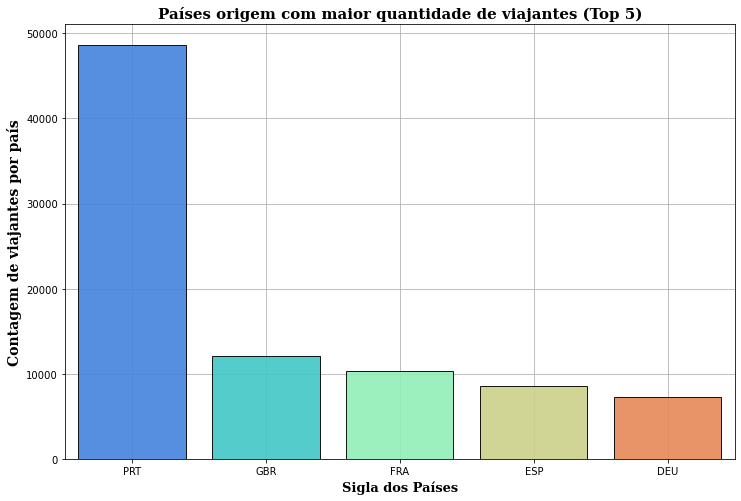

In [171]:
print(color.BOLD)

print('Lista de países origem contidos no DataSet: ')
print('\n')
print(list(df['country'].value_counts().index))

print('\n')
print('Lista de países origem com maior quantidade de viajantes (Top 5)')

print('\n')
print(df['country'].value_counts()[0:5])
print('\n')

plt.figure(figsize = (12,8))
sns.countplot(df['country'], data = df, order = df['country'].value_counts().index[0:5], linewidth = 1, edgecolor = 'black', palette = "rainbow",zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title('Países origem com maior quantidade de viajantes (Top 5)', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.xlabel('Sigla dos Países', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 13})
plt.ylabel('Contagem de viajantes por país', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
warnings.filterwarnings('ignore')